# **Comics Update**

## **Data Preprocessing**

### **1. Data Verification**

#### **1.1 Information and Data Types**

In [2]:
import pandas as pd # Importing pandas library for data manipulation and analysis

# Load data into DataFrame
df_comics = pd.read_csv('/Users/zhouxiaoyu/desktop/comics_update/tintin_emotion_pilot_data_04122024.csv')

In [3]:
# Display first few rows of the dataframe
df_comics.head()

,Project Name,Document Name,Document Directory,Page Number,Region ID,Annotation ID,Taxonomy Path,TotalPanels,Panel#,ComicOrdinalPanel,...,Title,Publication Date,Format,BookOriginalLanguage,CountryLang,LanguageFinal,Silent?,Genre Simplified,Style,StyleCluster
0,TINTIN Project,The Legend of Tteryel,ee628c6877967dd5e03e59a09a0dccb6,1,119909,347010,VLT: Compositional structure (v.4) / Panel,165.0,1.0,1,...,The Legend of Tteryel,2020,Comic book,NaN,Arabic,Arabic,Silent,Supernatural,Manga,Manga
1,TINTIN Project,The Legend of Tteryel,ee628c6877967dd5e03e59a09a0dccb6,1,119910,347011,VLT: Compositional structure (v.4) / Panel,165.0,2.0,2,...,The Legend of Tteryel,2020,Comic book,NaN,Arabic,Arabic,Silent,Supernatural,Manga,Manga
2,TINTIN Project,The Legend of Tteryel,ee628c6877967dd5e03e59a09a0dccb6,1,119907,347008,VLT: Compositional structure (v.4) / Panel,165.0,3.0,3,...,The Legend of Tteryel,2020,Comic book,NaN,Arabic,Arabic,Silent,Supernatural,Manga,Manga
3,TINTIN Project,The Legend of Tteryel,ee628c6877967dd5e03e59a09a0dccb6,1,119906,347007,VLT: Compositional structure (v.4) / Panel,165.0,4.0,4,...,The Legend of Tteryel,2020,Comic book,NaN,Arabic,Arabic,Silent,Supernatural,Manga,Manga
4,TINTIN Project,The Legend of Tteryel,ee628c6877967dd5e03e59a09a0dccb6,1,119908,347009,VLT: Compositional structure (v.4) / Panel,165.0,5.0,5,...,The Legend of Tteryel,2020,Comic book,NaN,Arabic,Arabic,Silent,Supernatural,Manga,Manga


In [4]:
# Check data types and information
df_comics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19191 entries, 0 to 19190
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project Name          19191 non-null  object 
 1   Document Name         19191 non-null  object 
 2   Document Directory    19191 non-null  object 
 3   Page Number           19191 non-null  int64  
 4   Region ID             19191 non-null  int64  
 5   Annotation ID         19191 non-null  int64  
 6   Taxonomy Path         19191 non-null  object 
 7   TotalPanels           19055 non-null  float64
 8   Panel#                19190 non-null  float64
 9   ComicOrdinalPanel     19191 non-null  int64  
 10  ComicOrdinal%         19055 non-null  float64
 11  Valence               19191 non-null  float64
 12  Arousal               19191 non-null  int64  
 13  Relative Area(%)      19191 non-null  float64
 14  Counter               19191 non-null  int64  
 15  Global Region      

**Information**
1. The dataset has 19,191 entries(panels).
2. In the dataset,'BookOriginalLanguage' and 'Silent?' logically contain non-null values depending on the comic's characteristics. Specifically, if a comic is silent, it likely won't have data under 'BookOriginalLanguage', but will instead have entries in 'Silent?'. Conversely, if the comic is not silent, 'BookOriginalLanguage' will typically be populated, while 'Silent?' remains empty. However, the reason for the presence of non-null values in columns such as 'TotalPanels', 'Panel#', 'ComicOrdinal%', and 'Genre Simplified' is unclear to me.

**Data Type**
1. float64(5): 5 columns contain floating-point numbers.
2. int64(7): 7 columns contain integers.
3. object(16): 16 columns contain objects, typically strings or mixed data types.

#### **1.2 Check for Null Values**

Given that 'TotalPanels' and 'ComicOrdinal%' have the same number of missing values, I'd like to verify whether these absences are from identical rows to aid further data analysis

In [5]:
import numpy as np # For the logical operations on the boolean arrays

# Check for missing values in 'TotalPanels' and 'ComicOrdinal%'
totalpanels_missing = df_comics['TotalPanels'].isnull() # Create a boolean array indicating missing values in 'TotalPanels'
comicordinal_missing = df_comics['ComicOrdinal%'].isnull() # Create a boolean array indicating missing values in 'ComicOrdinal%'

# Use numpy's logical_and to check for rows where both columns are simultaneously missing
# both_missing will be True only if both 'TotalPanels' and 'ComicOrdinal%' are missing in the same row
both_missing = np.logical_and(totalpanels_missing, comicordinal_missing)

# Use logical_xor to check for inconsistencies between the two columns' missing values
# not_consistent will be True if one column is missing and the other is not, indicating inconsistency
not_consistent = np.logical_xor(totalpanels_missing, comicordinal_missing)

# Calculate the number of inconsistent rows
# Summing the True values gives the total number of rows where the missing values are inconsistent
inconsistent_rows_count = not_consistent.sum()

# Print the results to see if there are any inconsistencies
if inconsistent_rows_count > 0:
    print(f"The missing values in 'TotalPanels' and 'ComicOrdinal%' are not entirely consistent, with {inconsistent_rows_count} inconsistent rows:")
    inconsistent_rows = df_comics[not_consistent]
    print(inconsistent_rows[['TotalPanels', 'ComicOrdinal%']])
else:
    print("The missing values in 'TotalPanels' and 'ComicOrdinal%' are consistent.")

The missing values in 'TotalPanels' and 'ComicOrdinal%' are consistent.


Next, I will print out all the tables with null values to see what findings emerge.

In [6]:
import numpy as np  # Import the numpy library for logical operations on boolean arrays

# Define columns to check for missing values
columns_to_check1 = ['TotalPanels', 'ComicOrdinal%']
columns_to_check2 = ['Panel#']
columns_to_check3 = ['BookOriginalLanguage']
columns_to_check4 = ['Genre Simplified']

# Base columns are required for all tables
base_columns = ['Document Name']

# Table 1: Check for missing values in 'TotalPanels' and 'ComicOrdinal%'
table1_columns = base_columns + columns_to_check1
table1 = df_comics[df_comics[columns_to_check1].isnull().any(axis=1)][table1_columns]
print("TABLE 1: MISSING IN 'TOTALPANELS', 'COMICORDINAL%'\n", table1)

# Print a separator for clarity
print("\n" + "-"*80 + "\n")

# Table 2: Check for missing values in 'Panel#'
table2_columns = base_columns + columns_to_check2
table2 = df_comics[df_comics[columns_to_check2].isnull().any(axis=1)][table2_columns]
print("TABLE 2: MISSING IN 'PANEL#'\n", table2)

# Print a separator for clarity
print("\n" + "-"*80 + "\n")

# Table 3: Check for missing values in 'BookOriginalLanguage'
table3_columns = base_columns + columns_to_check3
table3 = df_comics[df_comics[columns_to_check3].isnull().any(axis=1)][table3_columns]
print("TABLE 3: MISSING IN 'PANEL#'\n", table3)

# Print a separator for clarity
print("\n" + "-"*80 + "\n")

# Table 4: Check for missing values in 'Genre Simplified'
table4_columns = base_columns + columns_to_check4
table4 = df_comics[df_comics[columns_to_check4].isnull().any(axis=1)][table4_columns]
print("TABLE 4: MISSING IN 'GENRE SIMPLIFIED'\n", table4)

TABLE 1: MISSING IN 'TOTALPANELS', 'COMICORDINAL%'
       Document Name  TotalPanels  ComicOrdinal%
1129      Infection          NaN            NaN
1130      Infection          NaN            NaN
1131      Infection          NaN            NaN
1132      Infection          NaN            NaN
1133      Infection          NaN            NaN
...             ...          ...            ...
16032          Hope          NaN            NaN
16033          Hope          NaN            NaN
16034          Hope          NaN            NaN
16035          Hope          NaN            NaN
16036          Hope          NaN            NaN

[136 rows x 3 columns]

--------------------------------------------------------------------------------

TABLE 2: MISSING IN 'PANEL#'
               Document Name  Panel#
6904  Bon voyage M. Gruchet     NaN

--------------------------------------------------------------------------------

TABLE 3: MISSING IN 'PANEL#'
                Document Name BookOriginalLanguage


At present, there are no notable findings.

### **2. Data Preprocessing**

#### **2.1 Preprocessing**

In [7]:
# Create a copy of the original data to keep it intact while cleaning
df_comics_cleaned = df_comics.copy()

# 1. Handling missing values
# Remove rows where both TotalPanels and ComicOrdinal% are missing simultaneously
# This is done because missing both might indicate key information is absent, affecting analysis integrity
df_comics_cleaned = df_comics_cleaned.dropna(subset=['TotalPanels', 'ComicOrdinal%'], how='all')

# Remove rows where Panel# is missing since it only occurs once
df_comics_cleaned = df_comics_cleaned.dropna(subset=['Panel#'])

# Fill missing values in BookOriginalLanguage with 'Silent' and in Silent? with 'Non-Silent'
df_comics_cleaned['BookOriginalLanguage'].fillna('Silent', inplace=True)
df_comics_cleaned['Silent?'].fillna('Non-Silent', inplace=True)

# Remove rows with missing values in Genre Simplified as these are few and can compromise data completeness
df_comics_cleaned = df_comics_cleaned.dropna(subset=['Genre Simplified'])

# 2. Data type conversions
# Convert 'Publication Date' to integer type to simplify year-related analysis
df_comics_cleaned['Publication Date'] = df_comics_cleaned['Publication Date'].astype(int)

# Save the cleaned data to a new CSV file to ensure the original data is not overwritten
output_path = '/Users/zhouxiaoyu/desktop/comics_update/tintin_emotion_pilot_data_cleaned_04122024.csv'
df_comics_cleaned.to_csv(output_path, index=False)

# Print the cleaned data's info to confirm the processing results
print(df_comics_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18933 entries, 0 to 19190
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project Name          18933 non-null  object 
 1   Document Name         18933 non-null  object 
 2   Document Directory    18933 non-null  object 
 3   Page Number           18933 non-null  int64  
 4   Region ID             18933 non-null  int64  
 5   Annotation ID         18933 non-null  int64  
 6   Taxonomy Path         18933 non-null  object 
 7   TotalPanels           18933 non-null  float64
 8   Panel#                18933 non-null  float64
 9   ComicOrdinalPanel     18933 non-null  int64  
 10  ComicOrdinal%         18933 non-null  float64
 11  Valence               18933 non-null  float64
 12  Arousal               18933 non-null  int64  
 13  Relative Area(%)      18933 non-null  float64
 14  Counter               18933 non-null  int64  
 15  Global Region      

#### **2.2 Checking for Null Values**

In [8]:
# Quickly check whether there are missing values or not
total_missing = df_comics_cleaned.isnull().sum().sum()
print(f'Total missing values across all columns: {total_missing}')

Total missing values across all columns: 0


Now we can start data analysis.

## **Data Analysis**

### **1. Descriptive Statistical Analysis**

#### **1.1 Obtain Descriptive Statistical Information for Numeric Data**

In [9]:
# Define the columns I want to describe
columns_to_describe = ['Page Number', 'TotalPanels', 'Valence', 'Arousal', 'Relative Area(%)', 'Publication Date']

# Use the describe() method with custom statistics
# Default includes 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
numerical_summary = df_comics_cleaned[columns_to_describe].describe(percentiles=[.25, .5, .75])
numerical_summary = numerical_summary.drop(index='count')  # Remove the 'count' row

print("Numerical Data Summary:\n", numerical_summary)

Numerical Data Summary:
       Page Number  TotalPanels   Valence    Arousal  Relative Area(%)  \
mean     8.491787    81.251677 -0.147441   2.423969         14.964167   
std      5.785636    47.004638  0.552670   1.138697         13.691081   
min      1.000000    10.000000 -2.000000   0.000000          0.044835   
25%      4.000000    45.000000 -0.500000   2.000000          7.201931   
50%      7.000000    69.000000  0.000000   2.000000         11.115168   
75%     12.000000   109.000000  0.000000   3.000000         17.536125   
max     33.000000   237.000000  1.000000  33.000000        100.000163   

      Publication Date  
mean       2006.999102  
std          20.227317  
min        1943.000000  
25%        2004.000000  
50%        2016.000000  
75%        2019.000000  
max        2022.000000  


The above results offer a preliminary insight into the Numeric Data.

#### **1.2 Obtain Descriptive Statistical Information for Object Data**

In [10]:
# Exclude specific columns not relevant for analytical insights
exclude_columns = ['Project Name', 'Document Name', 'Document Directory', 'Taxonomy Path', 'Title']

# Select categorical columns excluding specified ones above
# Select all columns of object data type
category_columns = df_comics_cleaned.select_dtypes(include=['object']).columns
# Filter out columns from the list that are not relevant for the analysis
category_columns = [col for col in category_columns if col not in exclude_columns]

# Use value_counts() to view the distribution for each category column
for col in category_columns:
    print(f"Distribution for {col}:\n{df_comics_cleaned[col].value_counts()}\n")

# Determine the number of unique entries in each categorical column to assess diversity
unique_counts = {col: df_comics_cleaned[col].nunique() for col in category_columns}
print("Unique counts per categorical column:\n", unique_counts)

Distribution for Global Region:
Europe            6236
South America     3664
East Asia         2284
Africa            2267
North America     1664
Southeast Asia     801
Oceania            708
Middle East        596
South Asia         300
Central Asia       296
West Asia          117
Name: Global Region, dtype: int64

Distribution for RegionSimplified:
Europe               6236
South America        3664
East Asia            3085
Africa               2267
North America        1664
West Asia             713
Oceania               708
SouthCentral Asia     596
Name: RegionSimplified, dtype: int64

Distribution for Country:
China                               1256
Brazil                               978
France                               974
United States                        836
Germany                              801
                                    ... 
Romania                                1
Tanzania                               1
Senegal                                1
Rwan

The above results offer a preliminary insight into the object data.

#### **1.3 Skewness and Kurtosis**

In [11]:
# Exclude specific columns not relevant for analytical insights
exclude_columns = ['Region ID', 'Annotation ID', 'ComicOrdinalPanel', 'ComicOrdinal%', 'Counter']

# Select all numerical columns excluding specified ones above
numerical_columns = df_comics_cleaned.select_dtypes(include=['number']).columns # Select all numerical columns
columns_to_analyze = numerical_columns.difference(exclude_columns) # Filter out columns from the list

# Calculate the skewness for the selected columns
skewness = df_comics_cleaned[columns_to_analyze].skew()
print("Skewness of selected numerical data:\n", skewness)

# Add a blank line for better readability
print()

# Calculate the kurtosis for the selected columns
kurtosis = df_comics_cleaned[columns_to_analyze].kurtosis()
print("Kurtosis of selected numerical data:\n", kurtosis)

Skewness of selected numerical data:
 Arousal             1.800160
Page Number         1.028495
Panel#              1.083340
Publication Date   -1.878595
Relative Area(%)    3.199188
TotalPanels         1.183136
Valence             0.146880
dtype: float64

Kurtosis of selected numerical data:
 Arousal             31.539116
Page Number          0.732408
Panel#               1.302417
Publication Date     2.541683
Relative Area(%)    13.633408
TotalPanels          1.295231
Valence             -0.428481
dtype: float64


**Skewness**
**Positive Skew**: Variables such as Arousal, Page Number, Panel#, TotalPanels, and Relative Area(%) exhibit positive skewness, indicating that the distributions are right-skewed with longer tails on the right side. This suggests a concentration of values towards the lower end with fewer, larger outliers.
**Negative Skew**: Publication Date has a negative skew, meaning its distribution is left-skewed with a longer tail on the left side, indicating a concentration of values towards the higher end.
**Near Zero**: Valence shows a skewness close to zero, implying a more symmetric distribution.

**Kurtosis**
**Positive Kurtosis**: Most variables, including Arousal, Publication Date, Relative Area(%), TotalPanels, Panel#, and Page Number, demonstrate positive kurtosis, suggesting that the distributions are sharper peaks with fatter tails than a normal distribution. This typically indicates the presence of outliers.
**Negative Kurtosis**: Valence exhibits slight negative kurtosis, indicating a flatter peak compared to a normal distribution.

**Implications**
1. The results above give us basic understanding of the data distribution.
2. High positive skewness and kurtosis in variables like Arousal suggest the influence of outliers, which may need to be addressed through data cleaning.

#### **1.4 Data Clean for Outliers**

In [12]:
# Find rows where Arousal exceeds 5 and select only 'Arousal' and 'Document Name' for display
outliers = df_comics_cleaned[df_comics_cleaned['Arousal'] > 5][['Document Name', 'Arousal']]
print("Outliers where Arousal > 5:\n", outliers)

# Calculate and display the number of rows with Arousal values greater than 5
num_outliers = len(outliers)
print("Total number of outliers where Arousal > 5:", num_outliers)

# Remove rows where the Arousal value exceeds 5
df_comics_cleaned = df_comics_cleaned[df_comics_cleaned['Arousal'] <= 5]

Outliers where Arousal > 5:
                      Document Name  Arousal
7564   Tim Laudace et les Amazones       22
10079             Peter en de Wolf       33
Total number of outliers where Arousal > 5: 2


In [13]:
# Similarly, find and remove rows where Valence is less than -1
outliers_valence = df_comics_cleaned[df_comics_cleaned['Valence'] < -1][['Document Name', 'Valence']]
print("Outliers where Valence < -1:\n", outliers_valence)

# Calculate and display the number of rows with Valence values less than -1
num_outliers_valence = len(outliers_valence)
print("Total number of outliers where Valence < -1:", num_outliers_valence)

# Remove rows where the Valence value is less than -1
df_comics_cleaned = df_comics_cleaned[df_comics_cleaned['Valence'] >= -1]

Outliers where Valence < -1:
         Document Name  Valence
2240           Themba     -1.5
5550   Suske en Wiske     -1.5
12726     Danger Girl     -1.5
12742     Danger Girl     -2.0
13189           Spawn     -1.5
Total number of outliers where Valence < -1: 5


In [14]:
# Reset the DataFrame index to keep it clean and organized
df_comics_cleaned.reset_index(drop=True, inplace=True)

# Save the updated DataFrame to a new CSV file
output_path = '/Users/zhouxiaoyu/desktop/comics_update/tintin_emotion_pilot_data_cleaned2_04122024.csv'
df_comics_cleaned.to_csv(output_path, index=False)

print("Data cleaned and saved successfully.")

Data cleaned and saved successfully.


### **2. Data Distribution Analysis**

#### **2.1 Data Distribution for Numeric Variables**

For numeric variables such as Valence, Arousal, Relative Area(%), and Publication Date, I will create histograms to identify modes and peaks, and violin plots to better depict data density.

In [15]:
# Import libraries
import seaborn as sns # For visualization
import matplotlib.pyplot as plt # For creating charts and plots
import pingouin as pg # For statistical tests and exploratory data analysis. Documentation: https://pingouin-stats.org/build/html/index.htm

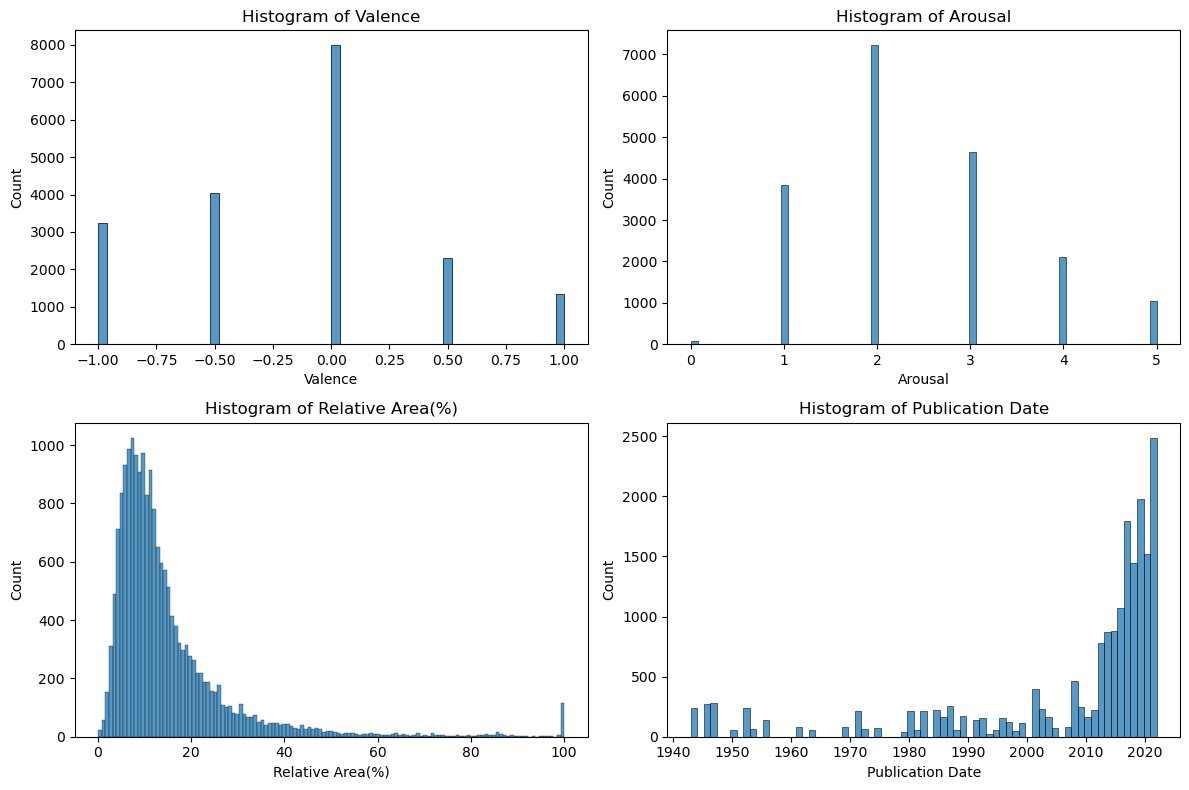

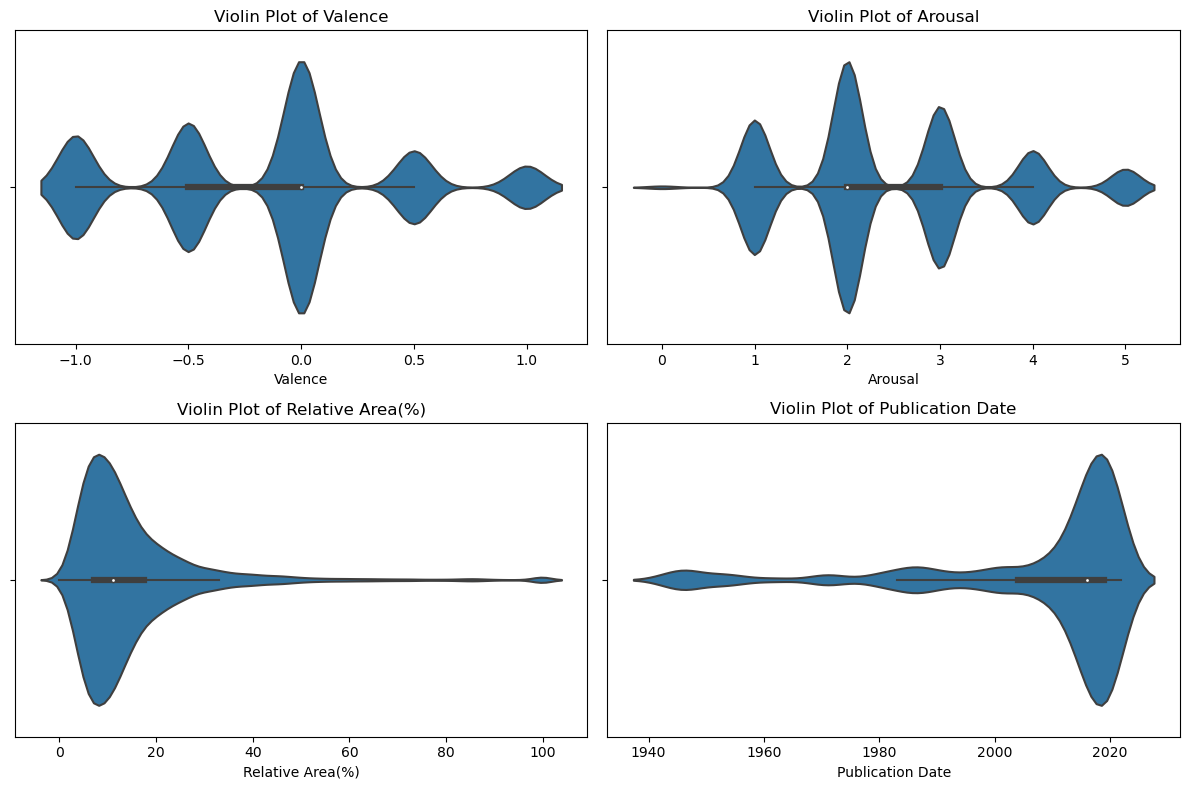

In [16]:
# Define the list of numeric columns
numeric_columns = ['Valence', 'Arousal', 'Relative Area(%)', 'Publication Date']


# Plotting histograms

# Set up the figure size for the histograms
plt.figure(figsize=(12, 8))

# Loop through each numeric column to create a histogram
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i) # Create a subplot for each histogram
    sns.histplot(df_comics_cleaned[column], kde=False) # Plot histogram without a kernel density estimate
    plt.title(f'Histogram of {column}') # Set title for each histogram
    
plt.tight_layout() # Adjust the layout to make sure there is no overlap
plt.show() # Display the histograms


# Plotting box plots

# Set up the figure size for violin plots
plt.figure(figsize=(12, 8))

# Loop through each numeric column to create a violin plot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i) # Create a subplot for each violin plot
    sns.violinplot(x=df_comics_cleaned[column])  # Create violin plot for each column
    plt.title(f'Violin Plot of {column}') # Set title for each plot

plt.tight_layout() # Adjust the layout to ensure there is no content overlap
plt.show() # Display the violin plots

#### **2.2 Data Distribution for Objective Variables**

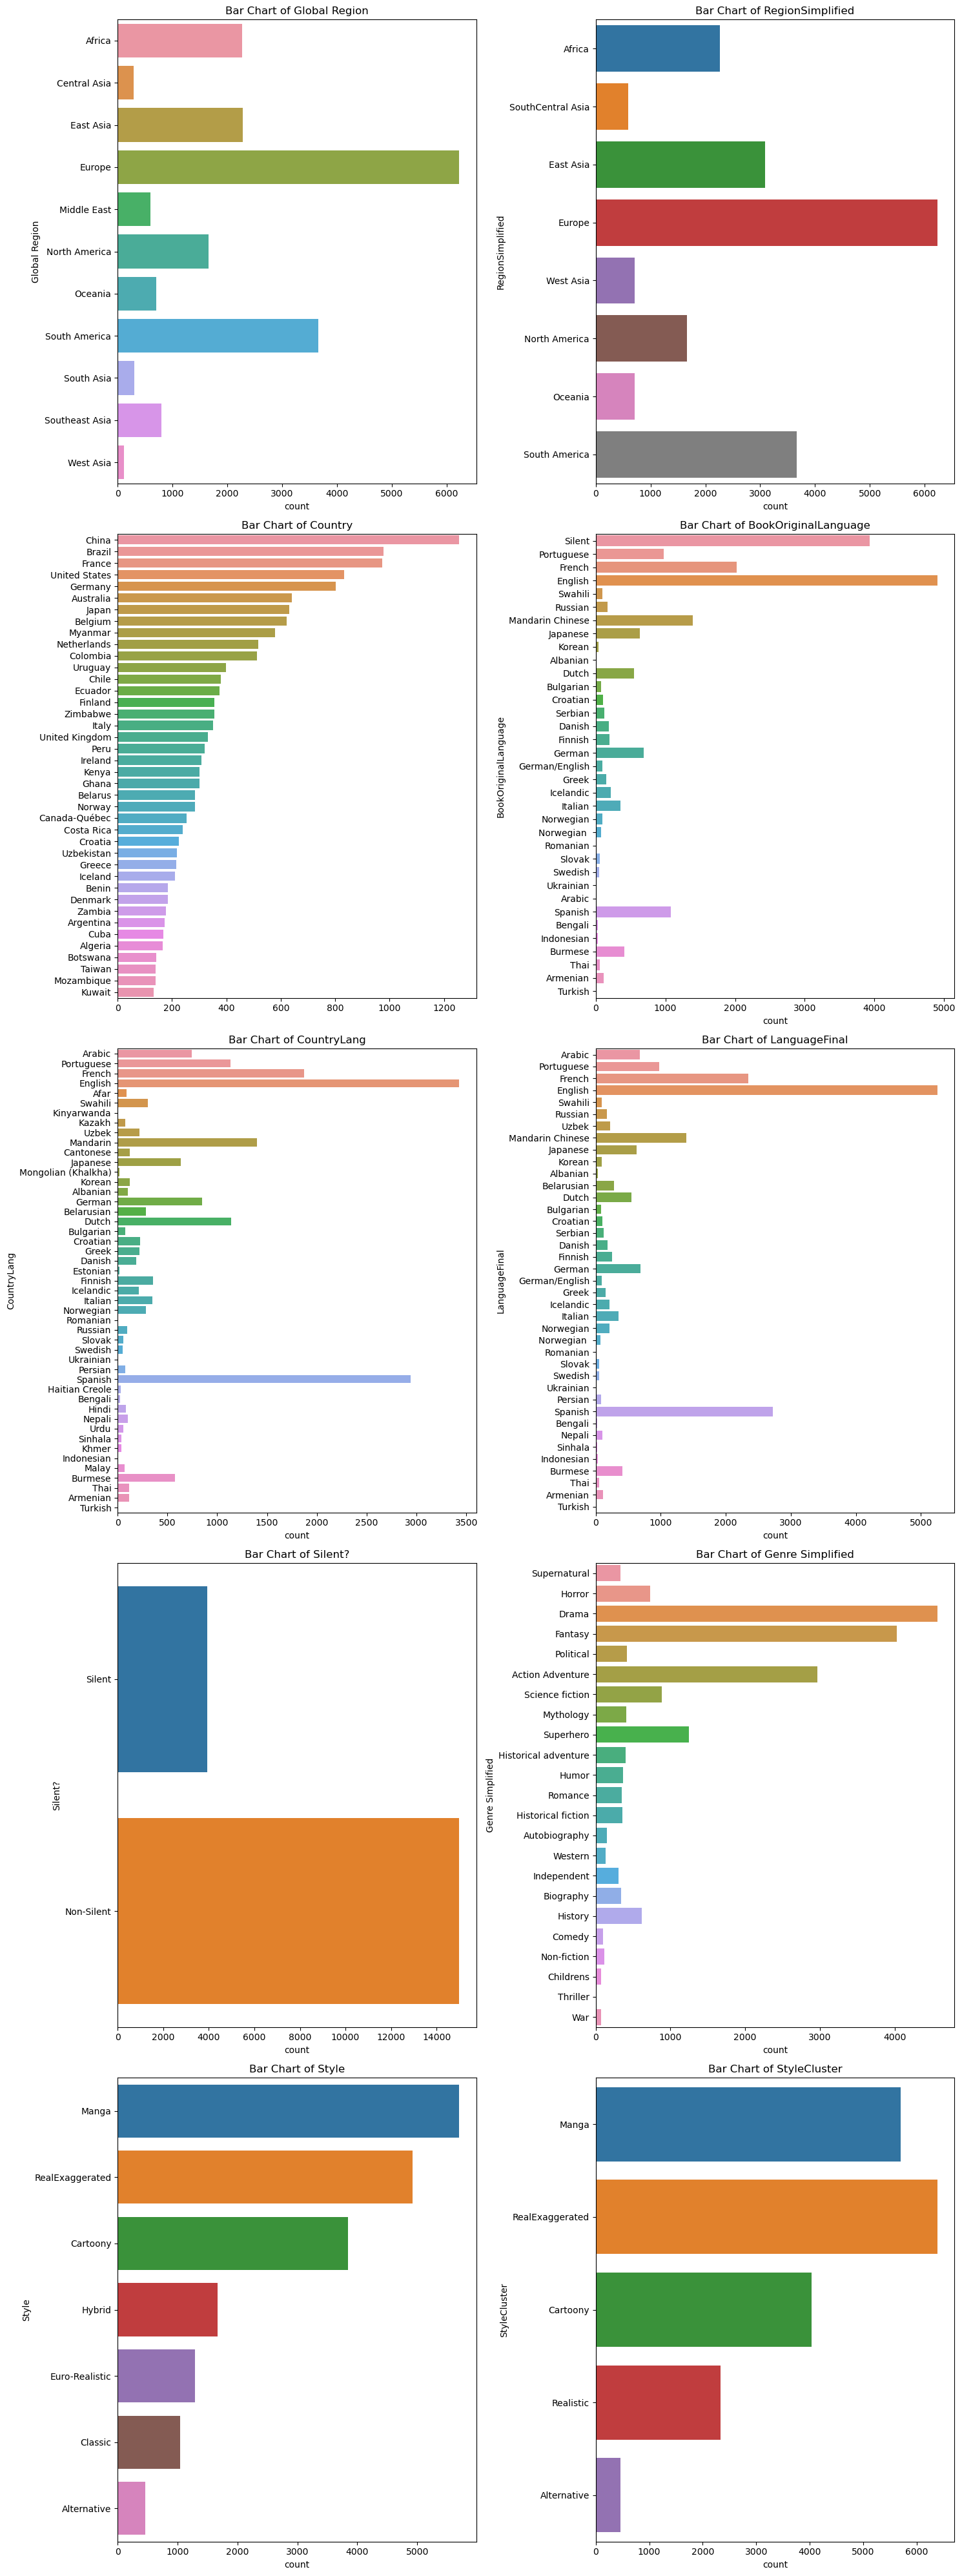

In [17]:
# Define the list of objective variables
categorical_columns = ['Global Region', 'RegionSimplified', 'Country', 'BookOriginalLanguage', 'CountryLang', 'LanguageFinal', 'Silent?', 'Genre Simplified', 'Style', 'StyleCluster']

# Set up the figure size, adjusting the height if necessary
plt.figure(figsize=(15, 40)) 

# Loop through each column to create bar charts
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)  # Create a subplot for each bar chart
    if column == 'Country':  # Special handling for 'Country' to adjust the vertical axis because of the excessive data
        top_countries = df_comics_cleaned['Country'].value_counts().head(40)  # Display only top 40 countries
        sns.barplot(x=top_countries.values, y=top_countries.index)  # Plot a bar chart
        plt.title(f'Top 40 Most Frequent Countries')
    else:
        sns.countplot(y=column, data=df_comics_cleaned)  # Plot a bar chart for each category
    plt.title(f'Bar Chart of {column}')  # Set the title for each chart
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()  # Display the bar charts

### **3. Valence and Arousal**

#### **3.1 Relationship Between Valence and Arousal**

##### **3.1.1 Scatter Plot and Regression Line** 

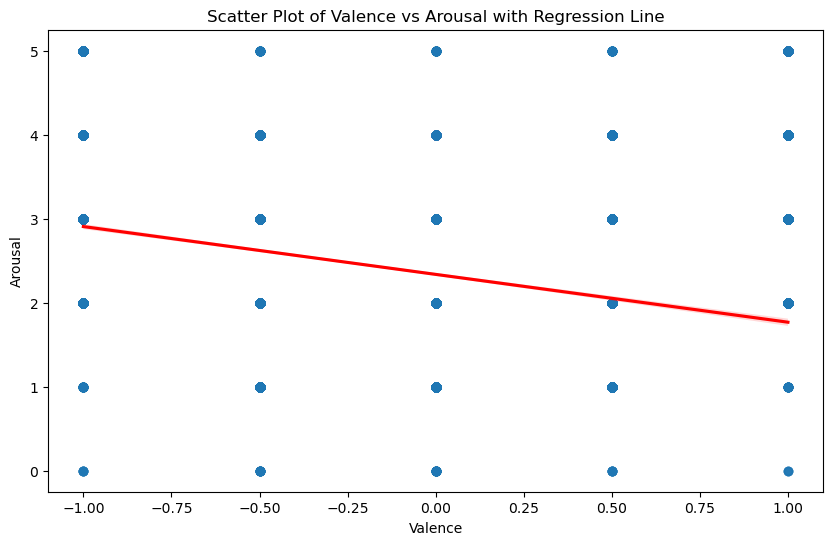

In [18]:
# Set Up Plot Figure:
plt.figure(figsize=(10, 6))

# Plotting the scatter plot with regression line:
sns.regplot(x='Valence', y='Arousal', data=df_comics_cleaned, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Scatter Plot of Valence vs Arousal with Regression Line')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

##### **3.1.2 Pearson Correlation**

In [19]:
# Calculate the Pearson correlation coefficient between 'Valence' and 'Arousal'
correlation = df_comics_cleaned[['Valence', 'Arousal']].corr()

# Set the float format for better display readability
pd.options.display.float_format = '{:.3f}'.format

# Print the title and the formatted correlation matrix
print("Correlation coefficient between Valence and Arousal:")
print(correlation.to_string())

Correlation coefficient between Valence and Arousal:
         Valence  Arousal
Valence    1.000   -0.284
Arousal   -0.284    1.000



1. Valence has a correlation of 1.000 with itself, which is expected.
2. Arousal has a correlation of 1.000 with itself, which is also expected.
3. The correlation between Valence and Arousal is -0.284, indicating a weak to moderate negative relationship. In other words, a higher arousal level in a panel is typically associated with a more negative valence.

##### **3.1.3 Regression Joint Plot**  

Then I'd like to create a jointplot that shows both the scatter plot and regression line between 'Valence' and 'Arousal' to visualize the relationship between these two variables better.

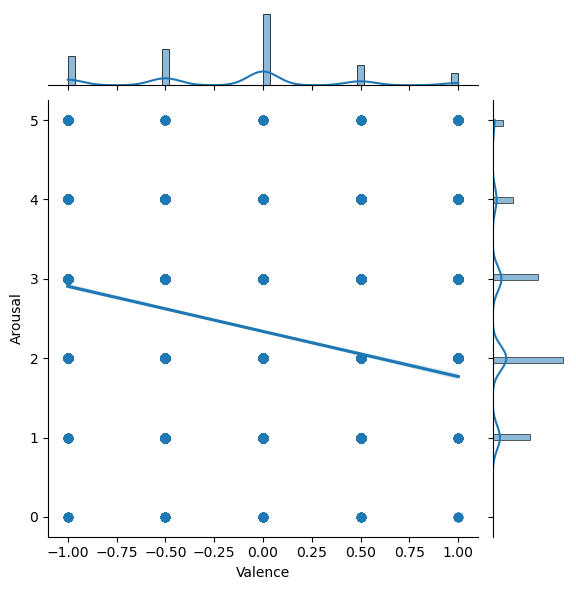

In [20]:
# Create a jointplot
sns.jointplot(x='Valence', y='Arousal', data=df_comics_cleaned, kind='reg')

# Display the plot
plt.show()

##### **3.1.3 Conclusion**  

The comprehensive analysis using Scatter Plots with Regression Lines, Pearson Correlation calculations, and Regression Joint Plots consistently reveals a weak negative correlation between Arousal and Valence, with a Pearson correlation coefficient of -0.284. This correlation indicates that higher levels of arousal within a panel are generally associated with more negative valence, and inform further explorations into emotion in various contexts.

#### **3.2 Relationship Between Valence and Arousal Across Different Categories**

Perform grouped analysis on the dataset to compare the means and distributions of Valence and Arousal across various categorical variables

#### **3.3 Relationship Between Valence, Arousal and Other Numeric Data**

##### **3.3.1 Heatmap**

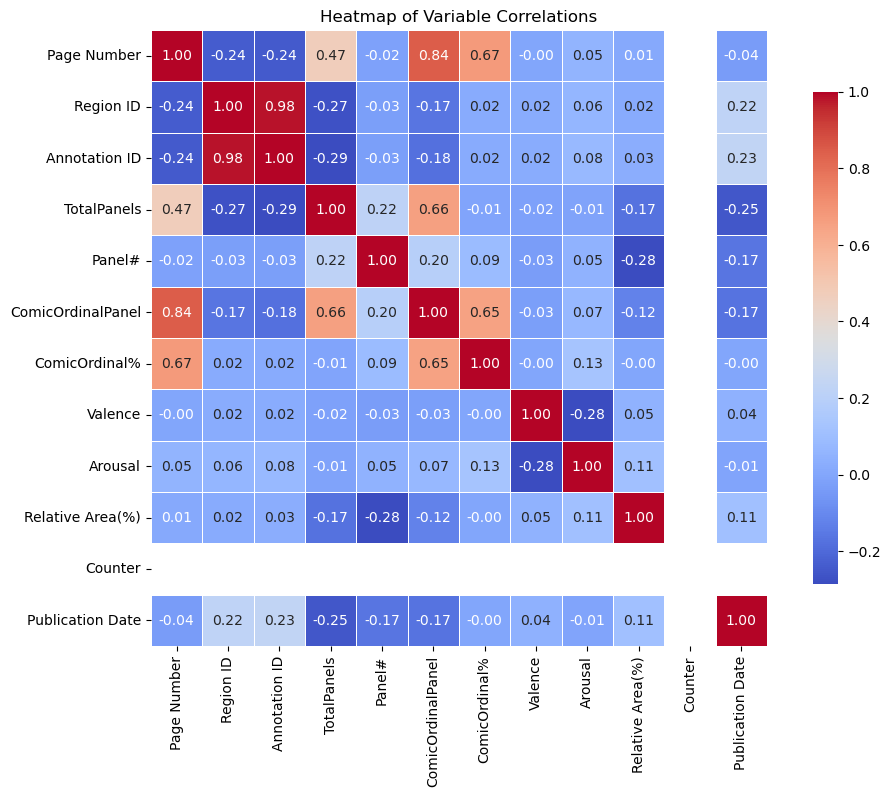

In [22]:
# Calculate the correlation matrix for numeric columns only
correlation_matrix = df_comics_cleaned.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

# Adding title and labels for clarity
plt.title('Heatmap of Variable Correlations')
plt.show()

Arousal and Valence show minimal correlation with other numeric variables in the dataset according to the heatmap.

#### **3.4 Relationship Between Valence, Arousal and Categorical Variables**